<a href="https://colab.research.google.com/github/aworklab/everydayPython/blob/main/ex_20221029.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 오늘의 목표
* Customer Analysis 
* Iterator

In [71]:
import pandas as pd 
import numpy as np
import plotnine as gg
from plotnine import ggplot, aes 
import matplotlib.pyplot as plt
import seaborn as sns

import os
import re

from functools import reduce 
from collections import defaultdict

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans

# Customer Analysis

In [3]:
os.listdir()

['.config',
 'sample-sales-data.csv',
 '1_orders_dataset.csv',
 '1_customers_dataset.csv',
 'online_retail_II.xlsx',
 'mock_sales_data.csv',
 '1_order_payments_dataset.csv',
 'match_result_test.csv',
 'sales.csv',
 'scanner_data.csv',
 'mall_customers.csv',
 'sales_data_with_stores.csv',
 'KPMG_VI_New_raw_data_update_final.csv',
 'online_retail.xlsx',
 'KPMG_VI_New_raw_data_update_final.xlsx',
 'test.csv',
 'groceries.csv',
 'ecommerce-data.csv',
 'sales_vs_discount.csv',
 'sample_data']

In [4]:
df = pd.read_csv('mock_sales_data.csv')
df.head()

,Date,Price,SalesQty
0,2021-01-04,122.0,1433.0
1,2021-01-05,118.6,977.0
2,2021-01-06,125.0,1551.0
3,2021-01-07,115.2,1096.0
4,2021-01-08,118.1,1052.0


In [8]:
df.columns = ['_'.join(re.split('(?=[A-Z][a-z])', a[0].lower() + a[1:])).lower() for a in df.columns]
df.head()

,date,price,sales_qty
0,2021-01-04,122.0,1433.0
1,2021-01-05,118.6,977.0
2,2021-01-06,125.0,1551.0
3,2021-01-07,115.2,1096.0
4,2021-01-08,118.1,1052.0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       252 non-null    object 
 1   price      252 non-null    float64
 2   sales_qty  252 non-null    float64
dtypes: float64(2), object(1)
memory usage: 6.0+ KB


In [10]:
df['date'] = df['date'].to_numpy().astype('datetime64[D]')
df['rev'] = df.price * df.sales_qty 
df.head()

,date,price,sales_qty,rev
0,2021-01-04,122.0,1433.0,174826.0
1,2021-01-05,118.6,977.0,115872.2
2,2021-01-06,125.0,1551.0,193875.0
3,2021-01-07,115.2,1096.0,126259.2
4,2021-01-08,118.1,1052.0,124241.2


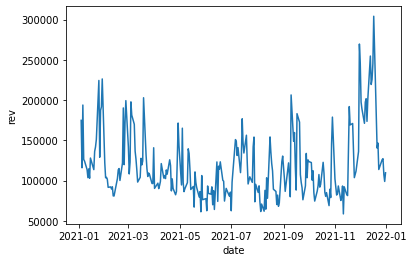

In [11]:
sns.lineplot(data = df, x = 'date', y = 'rev')

In [12]:
df.index = df['date']
df.head()

,date,price,sales_qty,rev
date,,,,
2021-01-04,2021-01-04,122.0,1433.0,174826.0
2021-01-05,2021-01-05,118.6,977.0,115872.2
2021-01-06,2021-01-06,125.0,1551.0,193875.0
2021-01-07,2021-01-07,115.2,1096.0,126259.2
2021-01-08,2021-01-08,118.1,1052.0,124241.2


In [25]:
df['rolling'] = df['rev'].rolling(window = 7).mean()
df.head()

,date,price,sales_qty,rev,rolling
date,,,,,
2021-01-04,2021-01-04,122.0,1433.0,174826.0,NaN
2021-01-05,2021-01-05,118.6,977.0,115872.2,NaN
2021-01-06,2021-01-06,125.0,1551.0,193875.0,NaN
2021-01-07,2021-01-07,115.2,1096.0,126259.2,NaN
2021-01-08,2021-01-08,118.1,1052.0,124241.2,NaN


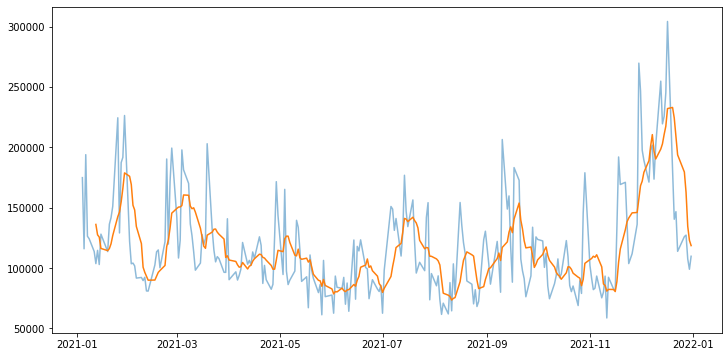

In [33]:
plt.figure(figsize = [12, 6])
plt.plot(df['rev'], alpha = .5)
plt.plot(df['rolling'])

In [34]:
os.listdir()

['.config',
 'sample-sales-data.csv',
 '1_orders_dataset.csv',
 '1_customers_dataset.csv',
 'online_retail_II.xlsx',
 'mock_sales_data.csv',
 '1_order_payments_dataset.csv',
 'match_result_test.csv',
 'sales.csv',
 'scanner_data.csv',
 'mall_customers.csv',
 'sales_data_with_stores.csv',
 'KPMG_VI_New_raw_data_update_final.csv',
 'online_retail.xlsx',
 'KPMG_VI_New_raw_data_update_final.xlsx',
 'test.csv',
 'groceries.csv',
 'ecommerce-data.csv',
 'sales_vs_discount.csv',
 'sample_data']

In [43]:
df = pd.read_csv('scanner_data.csv').drop('Unnamed: 0', axis = 1)
df.columns = ['id' if a == 'customer_id' else a.lower() for a in df.columns]
df = df.rename(columns = {'customer_id':'id'})
df['date'] = pd.to_datetime(df['date'], infer_datetime_format=True)
df['week'] = df['date'] - df['date'].dt.weekday.astype('timedelta64[D]')
df['rev'] = df.quantity * df.sales_amount
df.head()

,date,id,transaction_id,sku_category,sku,quantity,sales_amount,week,rev
0,2016-02-01,2547,1,X52,0EM7L,1.0,3.13,2016-02-01,3.13
1,2016-02-01,822,2,2ML,68BRQ,1.0,5.46,2016-02-01,5.46
2,2016-02-01,3686,3,0H2,CZUZX,1.0,6.35,2016-02-01,6.35
3,2016-02-01,3719,4,0H2,549KK,1.0,5.59,2016-02-01,5.59
4,2016-02-01,9200,5,0H2,K8EHH,1.0,6.88,2016-02-01,6.88


In [45]:
df = df.groupby(['id', 'week'])['rev'].sum().reset_index().sort_values(['id','week'])
df.head()

,id,week,rev
0,1,2016-01-18,16.29
1,2,2016-03-21,7.77
2,2,2016-06-13,15.00
3,3,2016-02-01,19.08
4,4,2016-09-05,26.60


In [49]:
list_npu = df.groupby(['id']).head(1)
list_week = df['week'].sort_values().unique()

In [56]:
res = list()

for weeks in list_week : 

  temp_npu = list_npu[list_npu['week'] == weeks]
  temp_pu = df[df['id'].isin(temp_npu['id'])]
  temp = temp_pu.groupby(['week'])['id'].count().reset_index().rename(columns = {'id':'pu'})
  temp['npu_week'] = np.repeat(weeks, len(temp))
  temp['diff'] = (temp['week'] - temp['npu_week']).dt.days // 7
  temp['ratio'] = round(temp['pu']/temp['pu'].max() * 100, 2)
  temp['npu_week'] = temp['npu_week'].astype(str)
  temp = temp[['npu_week', 'diff', 'pu', 'ratio']]

  res.append(temp)

res = pd.concat(res)
res = pd.melt(res, id_vars = ['npu_week', 'diff'], var_name = 'type')
res.head()


,npu_week,diff,type,value
0,2015-12-28,0,pu,326.0
1,2015-12-28,1,pu,16.0
2,2015-12-28,2,pu,39.0
3,2015-12-28,3,pu,51.0
4,2015-12-28,4,pu,62.0


/usr/local/lib/python3.7/dist-packages/plotnine/stats/stat_smooth.py:206: PlotnineWarning: Smoothing requires 2 or more points. Got 1. Not enough points for smoothing. If this message a surprise, make sure the column mapped to the x aesthetic has the right dtype.
/usr/local/lib/python3.7/dist-packages/plotnine/facets/facet.py:393: PlotnineWarning: If you need more space for the x-axis tick text use ... + theme(subplots_adjust={'wspace': 0.25}). Choose an appropriate value for 'wspace'.


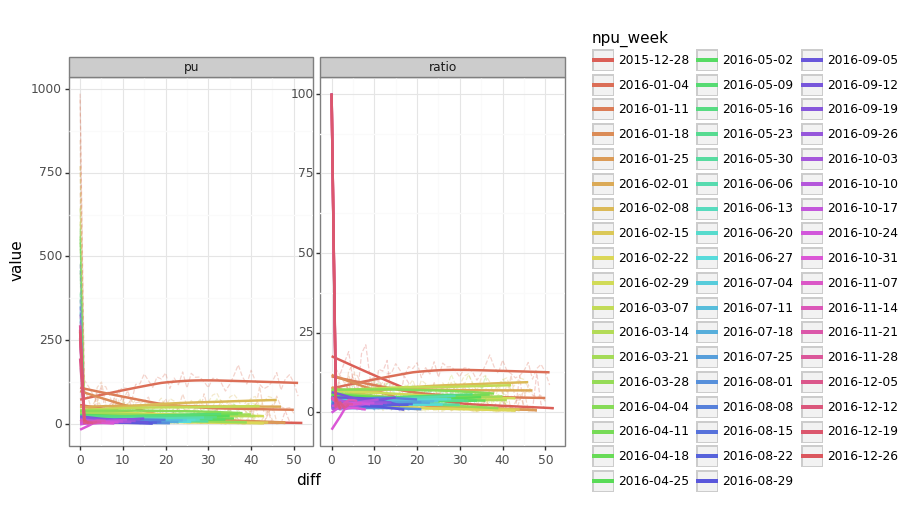

<ggplot: (8783437881389)>

In [57]:
(
    ggplot(res, aes('diff', 'value', color = 'npu_week')) +
    gg.geom_line(alpha = .3, linetype = 'dashed') +
    gg.geom_smooth(se = False) +
    gg.facet_wrap('~type', scales = 'free_y') +
    gg.theme_bw()
)

In [58]:
os.listdir()

['.config',
 'sample-sales-data.csv',
 '1_orders_dataset.csv',
 '1_customers_dataset.csv',
 'online_retail_II.xlsx',
 'mock_sales_data.csv',
 '1_order_payments_dataset.csv',
 'match_result_test.csv',
 'sales.csv',
 'scanner_data.csv',
 'mall_customers.csv',
 'sales_data_with_stores.csv',
 'KPMG_VI_New_raw_data_update_final.csv',
 'online_retail.xlsx',
 'KPMG_VI_New_raw_data_update_final.xlsx',
 'test.csv',
 'groceries.csv',
 'ecommerce-data.csv',
 'sales_vs_discount.csv',
 'sample_data']

In [59]:
df = pd.read_csv('KPMG_VI_New_raw_data_update_final.csv')
df.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,25-02-2017,False,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,21-05-2017,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,16-10-2017,False,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4,88,3135,31-08-2017,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5,78,787,01-10-2017,True,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0


In [62]:
wow1 = list()
wow2 = list()
wow3 = list()
for a in range(100) :
  wow1.append(df)
  wow2.append(df)
  wow3.append(df)

wow1 = pd.concat(wow1)
wow2 = pd.concat(wow2)
wow3 = pd.concat(wow3)

In [65]:
s1 = time.time()
wow1['transaction_date'] = pd.to_datetime(wow1['transaction_date'])
e1 = time.time()

s2 = time.time()
wow2['transaction_date'] = pd.to_datetime(wow2['transaction_date'], infer_datetime_format=True)
e2 = time.time()

wow1['transaction_date'] = wow1['transaction_date'].astype(str)

s3 = time.time()
wow1['transaction_date'].to_numpy().astype('datetime64[D]')
e3 = time.time()

res = list()
res.append(e1- s1)
res.append(e2- s2)
res.append(e3- s3)

In [86]:
scaler = MinMaxScaler()
res2 = scaler.fit_transform(np.array(res).reshape(-1,1))
res2 = [a[0] for a in res2]
res2

[1.0, 0.5790398440284024, 0.0]

<BarContainer object of 3 artists>

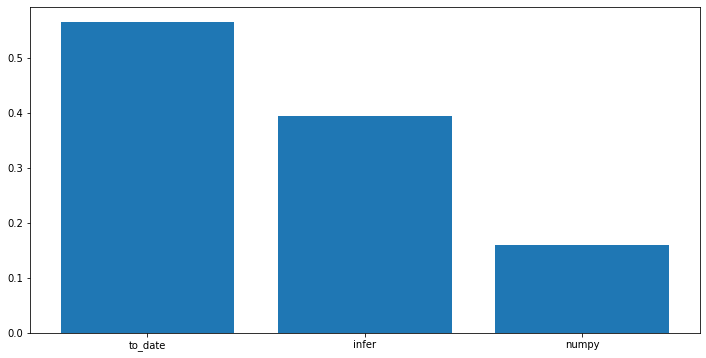

In [88]:
plt.figure(figsize = [12,6])
plt.bar(['to_date', 'infer', 'numpy'], res)

# Iterator

In [91]:
from string import ascii_lowercase
lt = list(ascii_lowercase) + list(range(10))

names = ['yoo', 'ki', 'kwan']

email1 = [''.join(np.random.choice(lt, np.random.randint(7, 10, 1), replace = True))   for a in range(3)]
email2 = np.random.choice(['@naver.com', '@gmail.com', '@nate.com', '@daum.net'], 3, replace = True)
email = [a + b for a, b in zip(email1, email2)]

age = np.random.randint(20, 40, 3)
score = [int(a) for a in np.random.normal(2000, 300, 3)]

In [92]:
[{k : v} for k, v in zip(names, zip(email, age, score))]

[{'yoo': ('ov0s9izd8@nate.com', 38, 1879)},
 {'ki': ('vd0qyi35@naver.com', 34, 2042)},
 {'kwan': ('g5o3uc38@daum.net', 31, 2515)}]